<img src="http://www.organicdatacuration.org/linkedearth/images/5/51/EarthLinked_Banner_blue_NoShadow.jpg">


# Welcome to Pyleoclim!

Pyleoclim is a python package for the analysis of paleoclimate data. It uses the <a href="http://www.clim-past.net/12/1093/2016/cp-12-1093-2016-discussion.html">LiPD</a> format.

Information about how LiPD, including a Notebook highlighting the main functionalities can be found <a href="https://github.com/nickmckay/LiPD-utilities">here</a>.

If you're new to Python and Jupyter Notebook, a quick tutorial is available <a href="https://github.com/nickmckay/LiPD-utilities/tree/master/Examples">here</a>

## Table of contents
* [Mapping](#maps)
* [Plotting](#plots)
    * [Summary plots](#sumplots)
* [Statistics](#basic)
* [Timeseries Manipulation](#timeseries)

To start, import the pyleoclim module. Example LiPD files can be downloaded <a href ="https://github.com/LinkedEarth/Pyleoclim_util/tree/master/Example">here</a>.

In [1]:
import pyleoclim as pyleo

//anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


All the Pyleoclim modules are loaded and ready to go. The sections below describe the available functions.

The pyleoclim package is meant work in tandem with the <a href='https://github.com/nickmckay/LiPD-utilities/tree/master/Python'>LiPD utilities</a>. However it is possible to use the various packages independently. For instance, calling pyleoclim.Stats will call the stats package and allows you to use the main functions without the need of a timeseries object, a centerpiece of the LiPD package.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p> When using the packages individually, be careful about handling missing values</p>
</div>  

The following functions allow to load LiPD files into the workspace and extract the timeseries object. They are named after their counterpart in the LiPD utitilies. The main advantage of using the functions included with the Pyleoclim package is that the lipd dictionary and list of timeseries are declared as global variables, bypassing the prompt for every function included in this package. 

If you forget this step, you'll be prompted when first using any of the pyleoclim methods.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p> If the list of timeseries is specified, the path ***needs*** to be specified as well</p>
</div>  

In [15]:
lipds = pyleo.readLipd("/Users/deborahkhider/Documents/Python/Pyleoclim_util/Example")

Disclaimer: LiPD files may be updated and modified to adhere to standards

Found: 15 LiPD file(s)
reading: Ant-JamesRossIsland.Mulvaney.2013.lpd
reading: Arc-LakeNataujärvi.Ojala.2005.lpd
reading: Arc-Yukon.D'Arrigo.2006.lpd
reading: Asi-Dasuopu.Thompson.2000.lpd
reading: Asi-TH001.Buckley.2010.lpd
reading: Eur-NorthernSpain.Martín-Chivelet.2011.lpd
reading: Juxtlahuaca.Lachniet.2012.lpd
reading: MD01-2378.Xu.2008.lpd
reading: MD97-2121.Marr.2013.lpd
reading: MD98-2170.Stott.2004.lpd
reading: MD982176.Stott.2004.lpd
reading: Ocn-MadangLagoonPapuaNewGuinea.Kuhnert.2001.lpd
reading: Ocn-MontegoBayJamaica.Haase-Schramm.2003.lpd
reading: Ocn-SantaBarbaraBasin.Zhao.2000.lpd
reading: Ocn-TongueoftheOcean.Rosenheim.2005.lpd
Error: Indexing table data: 'columns'
put_tsids: level 2: Exception: columns, 'list' object has no attribute 'items'
Error: Missing filename for: chron.chron0.measurement.chron0measurement0, cannot load this file
Error: Indexing table data: 'columns'
put_tsids: level 2: Ex

In [16]:
ts_list = pyleo.extractTs(lipds)

extracting paleoData...
extracting: Ocn-MontegoBayJamaica.Haase-Schramm.2003
extracting: Juxtlahuaca.Lachniet.2012
extracting: Arc-LakeNataujärvi.Ojala.2005
extracting: Ant-JamesRossIsland.Mulvaney.2013
extracting: MD982176.Stott.2004
extracting: Arc-Yukon.D'Arrigo.2006
extracting: Ocn-MadangLagoonPapuaNewGuinea.Kuhnert.2001
extracting: MD98-2170.Stott.2004
extracting: Ocn-TongueoftheOcean.Rosenheim.2005
extracting: Asi-Dasuopu.Thompson.2000
extracting: Asi-TH001.Buckley.2010
extracting: MD01-2378.Xu.2008
extracting: MD97-2121.Marr.2013
extract: Exception: can only concatenate list (not "str") to list
extracting: Ocn-SantaBarbaraBasin.Zhao.2000
extracting: Eur-NorthernSpain.Martín-Chivelet.2011
Created time series: 49 entries


## <a id="mapping"> Mapping </a>

### mapAllArchive()

This function maps all the LiPD records in the working directory according to archiveType. It uses a default palette color accessible by typing `pyleo.plot_default`

Synthax: `fig = pyleoclim.mapAll(lipds = "", markersize = 50, background = 'shadedrelief', figsize = [10,4], saveFig = False, dir = "", format = "eps")`

Arguments:
* `lipds`: A dictionary of LiPD files. (Optional)
* `markersize`: default is 50
* `background`: Plots one of the following images on the map: bluemarble, etopo, shadedrelief, or none (filled continents). Default is shadedrelief.
* `figsize`: The size for the figure
* `saveFig`: if `True`, saves the map into the `dir` folder in the current working directory. 
* `dir`: a folder in the current directory, where the various figures can be saved. If left blank, a folder named `figures` will be automatically created
* `format`: One of the file extensions supported by the ative backend. Default is `eps`. Most backends support `png`, `pdf`, `ps`, and `svg`. 

Returns: The figure

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p> This function takes optional arguments. If they are specified byt the user, then Python will use the specified values, otherwise the function will run with the default value. Unlike required arguments, optional arguments always include an equal sign with the specified values.</p>
<p> To run the function with the default arguments, simply use `FunctionName()`</p>
<p> If you wish to only change one argument from its default value, just enter the argument name followed by its new value.</p>
</div>   

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p> To visualize matplotlib plot inside the Notebook, we need to use the `%matplotib notebook` or `%matplotib inline` Magic command. Jupyter has an extensive list of special functions called Magic commands. These commands are built-in and can be run from anywhere. They are generally identified by their preceding % sign. </p> 
</div> 

//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (

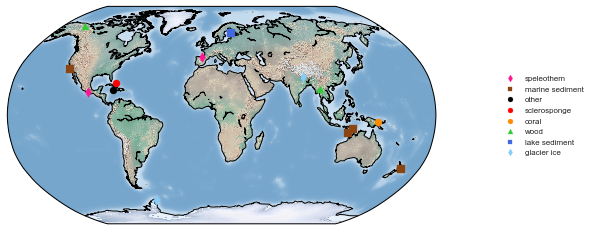

In [5]:
%matplotlib inline
fig = pyleo.mapAllArchive()

Let's change the marksize to 100.

//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (

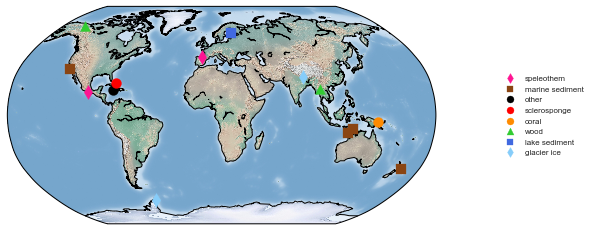

In [6]:
%matplotlib inline
fig = pyleo.mapAllArchive(markersize = 100)

### mapLipd()

This function maps one particular LiPD record stored in the working directory.

Synthax: `fig = pyleoclim.mapLipd(timeseries="", countries = True, counties = False, \
        rivers = False, states = False, background = "shadedrelief",\
        scale = 0.5, markersize = 50, marker = "default", figsize = [4,4] \
        saveFig = False, dir = "", format="eps")`
        
Optional arguments:
* `timeseries`: a LiPD timeseries object. Will prompt for one if not given
* `countries`: Draws the country borders. Default is on (True).
* `counties`: Draws the USA counties. Default is off (False).
* `rivers`: Draws the rivers. Default is off (False). 
* `states`: Draws the American and Australian states borders. Default is off (False)
* `background`: Plots one of the following images on the map: bluemarble, etopo, shadedrelief, or none (filled continents). Default is shadedrelief
* `scale`: useful to downgrade the original image resolution to speed up the process. Default is 0.5.
* `markersize`: default is 50
* `marker`: a string (or list) containing the color and shape of the marker. Default is by archiveType. Type pyleo.plot_default to see the default palette. 
* `figsize`: The size of the figure         
* `saveFig`: default is to save the figure
* `dir`: the full path of the directory in which to save the figure. If not provided, creates a default folder called 'figures' in the LiPD working directory (lipd.path).  
* `format`: One of the file extensions supported by the active backend. Default is "eps". Most backend support png, pdf, ps, eps, and svg.

0 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  Sr_Ca
1 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  year
2 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  d18O
3 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  year
4 :  Juxtlahuaca.Lachniet.2012 :  distance_from_top
5 :  Juxtlahuaca.Lachniet.2012 :  d18o_measurement
6 :  Juxtlahuaca.Lachniet.2012 :  d18o_precision
7 :  Juxtlahuaca.Lachniet.2012 :  age
8 :  Arc-LakeNataujärvi.Ojala.2005 :  X_radiograph_dark_layer
9 :  Arc-LakeNataujärvi.Ojala.2005 :  year
10 :  Ant-JamesRossIsland.Mulvaney.2013 :  dD
11 :  Ant-JamesRossIsland.Mulvaney.2013 :  year
12 :  Arc-Yukon.D'Arrigo.2006 :  trsgi
13 :  Arc-Yukon.D'Arrigo.2006 :  year
14 :  Ocn-MadangLagoonPapuaNewGuinea.Kuhnert.2001 :  d18O
15 :  Ocn-MadangLagoonPapuaNewGuinea.Kuhnert.2001 :  year
16 :  MD98-2170.Stott.2004 :  depth
17 :  MD98-2170.Stott.2004 :  age
18 :  MD98-2170.Stott.2004 :  mg/ca
19 :  MD98-2170.Stott.2004 :  d180
20 :  MD98-2170.Stott.2004 :  d180w
21 :  MD98-2170.Stott.20

//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


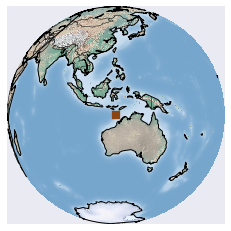

In [8]:
%matplotlib inline
fig = pyleo.mapLipd()

## <a id="plots">Plotting</a>

### plotTs()

Plot a time series. 

Synthax:
`fig = pyleoclim.plotTs(timeseries = "", x_axis = "", markersize = 50, marker = "default", figsize = [10,4], saveFig = False, dir = "figures", format="eps")`

Optional arguments:
* `timeseries`: A timeseries object as defined in LiPD. If left blank, you'll be prompted to choose the record from a list.
* `x-axis`: The representation against which to plot the paleo-data. Options are "age","year", and "depth". Default is to let the system choose if only one available or prompt the user. 
* `markersize`: Default is 50
* `marker`: Shape and color. Default uses the Pyleoclim color palette. If you wish to change the default marker, enter the color and shape (**in this order**). For instance to use a red square, use `'rs'`.
* `figsize`: The size of the figure
*  `saveFig`: if `True`, saves the plot into the `dir` folder in the current working directory. 
* `dir`: a folder in the current directory, where the various figures can be saved. If left blank, a folder named `figures` will be automatically created
* `format`: One of the file extensions supported by the ative backend. Default is `eps`. Most backends support `png`, `pdf`, `ps`, and `svg`. 

0 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  Sr_Ca
1 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  year
2 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  d18O
3 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  year
4 :  Juxtlahuaca.Lachniet.2012 :  distance_from_top
5 :  Juxtlahuaca.Lachniet.2012 :  d18o_measurement
6 :  Juxtlahuaca.Lachniet.2012 :  d18o_precision
7 :  Juxtlahuaca.Lachniet.2012 :  age
8 :  Arc-LakeNataujärvi.Ojala.2005 :  X_radiograph_dark_layer
9 :  Arc-LakeNataujärvi.Ojala.2005 :  year
10 :  Ant-JamesRossIsland.Mulvaney.2013 :  dD
11 :  Ant-JamesRossIsland.Mulvaney.2013 :  year
12 :  Arc-Yukon.D'Arrigo.2006 :  trsgi
13 :  Arc-Yukon.D'Arrigo.2006 :  year
14 :  Ocn-MadangLagoonPapuaNewGuinea.Kuhnert.2001 :  d18O
15 :  Ocn-MadangLagoonPapuaNewGuinea.Kuhnert.2001 :  year
16 :  MD98-2170.Stott.2004 :  depth
17 :  MD98-2170.Stott.2004 :  age
18 :  MD98-2170.Stott.2004 :  mg/ca
19 :  MD98-2170.Stott.2004 :  d180
20 :  MD98-2170.Stott.2004 :  d180w
21 :  MD98-2170.Stott.20

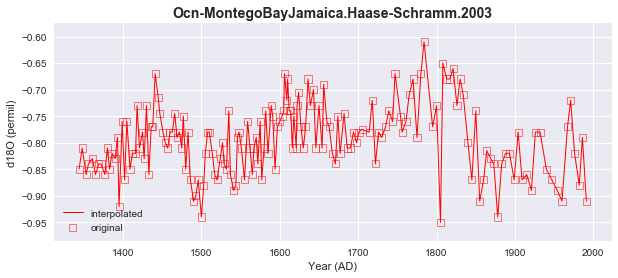

In [9]:
%matplotlib inline
fig = pyleo.plotTs(marker = 'rs')

### histTs()

Plot a time series. 

Synthax:
`fig = pyleoclim.histTs(timeseries = "", bins = None, hist = True, \
             kde = True, rug = False, fit = None, hist_kws = {"label":"Histogram"},\
             kde_kws = {"label":"KDE fit"}, rug_kws = {"label":"Rug"}, \
             fit_kws = {"label":"Fit"}, color = "default", vertical = False, \
             norm_hist = True,  figsize = [5,5], saveFig = False, format ="eps",\
             dir = "")`

Optional arguments:
* `timeseries`: A timeseries object as defined in LiPD. If left blank, you'll be prompted to choose the record from a list.
* `bins`: Specification of hist bins following matplotlib(hist), or None to use Freedman-Diaconis rule
* `hist`: Whether to plot a (normed) histogram    
* `kde`: Whether to plot a gaussian kernel density estimate
* `rug`: Whether to draw a rugplot on the support axis
* `fit`: Random variable object. An object with fit method, returning a tuple that can be passed to a pdf method of positional arguments following a grid of values to evaluate the pdf on.
* `{hist, kde, rug, fit}_kws`: Dictionaries. Keyword arguments for underlying plotting functions. If modifying the dictionary, make sure the labels "hist", "kde", "rug" and "fit" are still passed.
* `color`: matplotlib color. Color to plot everything but the fitted curve in.
* `vertical`: if True, oberved values are on y-axis.
* `norm_hist`: If True (default), the histrogram height shows a density rather than a count. This is implied if a KDE or fitted density is plotted
* `figsize`: The size of the figure
* `saveFig`: If True, saves the figure
* `dir`: a folder in the current directory, where the various figures can be saved. If left blank, a folder named `figures` will be automatically created
* `format`: One of the file extensions supported by the ative backend. Default is `eps`. Most backends support `png`, `pdf`, `ps`, and `svg`. 

0 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  Sr_Ca
1 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  year
2 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  d18O
3 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  year
4 :  Juxtlahuaca.Lachniet.2012 :  distance_from_top
5 :  Juxtlahuaca.Lachniet.2012 :  d18o_measurement
6 :  Juxtlahuaca.Lachniet.2012 :  d18o_precision
7 :  Juxtlahuaca.Lachniet.2012 :  age
8 :  Arc-LakeNataujärvi.Ojala.2005 :  X_radiograph_dark_layer
9 :  Arc-LakeNataujärvi.Ojala.2005 :  year
10 :  Ant-JamesRossIsland.Mulvaney.2013 :  dD
11 :  Ant-JamesRossIsland.Mulvaney.2013 :  year
12 :  Arc-Yukon.D'Arrigo.2006 :  trsgi
13 :  Arc-Yukon.D'Arrigo.2006 :  year
14 :  Ocn-MadangLagoonPapuaNewGuinea.Kuhnert.2001 :  d18O
15 :  Ocn-MadangLagoonPapuaNewGuinea.Kuhnert.2001 :  year
16 :  MD98-2170.Stott.2004 :  depth
17 :  MD98-2170.Stott.2004 :  age
18 :  MD98-2170.Stott.2004 :  mg/ca
19 :  MD98-2170.Stott.2004 :  d180
20 :  MD98-2170.Stott.2004 :  d180w
21 :  MD98-2170.Stott.20

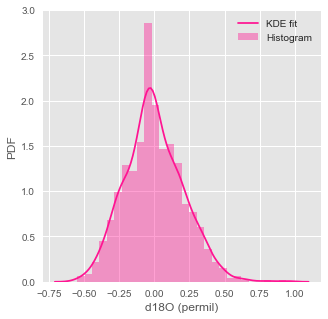

In [10]:
%matplotlib inline
fig = pyleo.histTs()

### Summary Plots
Summary Plots are special plots in Pyleoclim that allow to get basic information about a record.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p> These functions use the default color palette and are not customizable.</p> 
</div> 

#### basicSummary()

This functions plots:
1. The time series
2. A histogram of the paleoData values
3. The location map
4. Spectral analysis if time information is available in the paleoDataTable
5. Metadata information

Synthax: `fig = pyleoclim.SummaryTs(timeseries = "", x_axis="", saveFig = False, format = "eps", dir = "figures")`

* `timeseries`: A timeseries object as defined in LiPD. If left blank, you'll be prompted to choose the record from a list.
* `x-axis`: The representation against which to plot the paleo-data. Options are "age","year", and "depth". Default is to let the system choose if only one available or prompt the user.  
*  `saveFig`: if `True`, saves the map into the `dir` folder in the current working directory. 
* `dir`: a folder in the current directory, where the various figures can be saved. If left blank, a folder named `figures` will be automatically created
* `format`: One of the file extensions supported by the ative backend. Default is `eps`. Most backends support `png`, `pdf`, `ps`, and `svg`. 

0 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  Sr_Ca
1 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  year
2 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  d18O
3 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  year
4 :  Juxtlahuaca.Lachniet.2012 :  distance_from_top
5 :  Juxtlahuaca.Lachniet.2012 :  d18o_measurement
6 :  Juxtlahuaca.Lachniet.2012 :  d18o_precision
7 :  Juxtlahuaca.Lachniet.2012 :  age
8 :  Arc-LakeNataujärvi.Ojala.2005 :  X_radiograph_dark_layer
9 :  Arc-LakeNataujärvi.Ojala.2005 :  year
10 :  Ant-JamesRossIsland.Mulvaney.2013 :  dD
11 :  Ant-JamesRossIsland.Mulvaney.2013 :  year
12 :  Arc-Yukon.D'Arrigo.2006 :  trsgi
13 :  Arc-Yukon.D'Arrigo.2006 :  year
14 :  Ocn-MadangLagoonPapuaNewGuinea.Kuhnert.2001 :  d18O
15 :  Ocn-MadangLagoonPapuaNewGuinea.Kuhnert.2001 :  year
16 :  MD98-2170.Stott.2004 :  depth
17 :  MD98-2170.Stott.2004 :  age
18 :  MD98-2170.Stott.2004 :  mg/ca
19 :  MD98-2170.Stott.2004 :  d180
20 :  MD98-2170.Stott.2004 :  d180w
21 :  MD98-2170.Stott.20

//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (

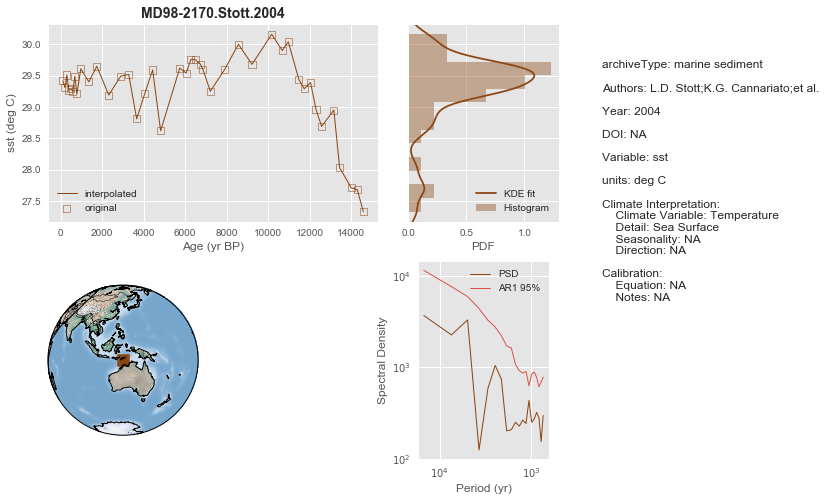

In [11]:
%matplotlib inline
fid = pyleo.summaryTs()

## <a id="basic"> Statistics </a>

### statsTs()

Returns the mean, median, min, max, standard deviation and interquartile range of the timeseries.

synthax: `mean, median, min, max, std, IQR = pyleoclim.statsTs(timeseries="")`

Optional arguments:
* `timeseries`: If blank, will prompt for one.

In [12]:
mean, median, min_v, max_v, std, IQR = pyleo.statsTs()
print(mean)
print(median)
print(min_v)
print(max_v)
print(std)
print(IQR)

0 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  Sr_Ca
1 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  year
2 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  d18O
3 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  year
4 :  Juxtlahuaca.Lachniet.2012 :  distance_from_top
5 :  Juxtlahuaca.Lachniet.2012 :  d18o_measurement
6 :  Juxtlahuaca.Lachniet.2012 :  d18o_precision
7 :  Juxtlahuaca.Lachniet.2012 :  age
8 :  Arc-LakeNataujärvi.Ojala.2005 :  X_radiograph_dark_layer
9 :  Arc-LakeNataujärvi.Ojala.2005 :  year
10 :  Ant-JamesRossIsland.Mulvaney.2013 :  dD
11 :  Ant-JamesRossIsland.Mulvaney.2013 :  year
12 :  Arc-Yukon.D'Arrigo.2006 :  trsgi
13 :  Arc-Yukon.D'Arrigo.2006 :  year
14 :  Ocn-MadangLagoonPapuaNewGuinea.Kuhnert.2001 :  d18O
15 :  Ocn-MadangLagoonPapuaNewGuinea.Kuhnert.2001 :  year
16 :  MD98-2170.Stott.2004 :  depth
17 :  MD98-2170.Stott.2004 :  age
18 :  MD98-2170.Stott.2004 :  mg/ca
19 :  MD98-2170.Stott.2004 :  d180
20 :  MD98-2170.Stott.2004 :  d180w
21 :  MD98-2170.Stott.20

### corrSigTs

Estimates the significance of correlations between two timeseries

synthax: `r, sig, p = pyleoclim.corrSigTs(timeseries1 = "", timeseries2 = "", x_axis = "", \
                 interp_step = "", start = "", end = "", nsim = 1000, \
                 method = 'isospectral', alpha = 0.5))`

Optional arguments:
* `timeseries1, timeseries2`: timeseries object. Default is blank.
* `x-axis (str)`: The representation against which to express thempaleo-data. Options are "age", "year", and "depth". Default is to let the system choose if only one available or prompt the user.
* `interp_step (float)`: the step size. By default, will prompt the user.
* `start (float)`: Start time/age/depth. Default is the maximum of the minima of the two timeseries
* `end (float)`: End time/age/depth. Default is the minimum of themaxima of the two timeseries
* `nsim (int)`: the number of simulations. Default is 1000
* `method (str)`: method use to estimate the correlation and significance.
   Available methods include:
   - 'ttest': T-test where the degrees of freedom are corrected for the effect of serial correlation
   - 'isopersistant': AR(1) modeling of the two timeseries
   - 'isospectral' (default): phase randomization of original inputs.
   The T-test is parametric test, hence cheap but usually wrong except in idyllic circumstances.
   The others are non-parametric, but their computational requirements scales with nsim.
* `alpha (float)`: significance level for critical value estimation. Default is 0.05

Returns:
* `r (float)`: correlation between the two timeseries
* `sig (bool)`: Returns Trus if significant, False otherwise
* `p (real)`: significance level for critical value estimation

In [17]:
r,sig,p = pyleo.corrSigTs()
print(r)
print(sig)
print(p)

0 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  Sr_Ca
1 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  year
2 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  d18O
3 :  Ocn-MontegoBayJamaica.Haase-Schramm.2003 :  year
4 :  Juxtlahuaca.Lachniet.2012 :  distance_from_top
5 :  Juxtlahuaca.Lachniet.2012 :  d18o_measurement
6 :  Juxtlahuaca.Lachniet.2012 :  d18o_precision
7 :  Juxtlahuaca.Lachniet.2012 :  age
8 :  Arc-LakeNataujärvi.Ojala.2005 :  X_radiograph_dark_layer
9 :  Arc-LakeNataujärvi.Ojala.2005 :  year
10 :  Ant-JamesRossIsland.Mulvaney.2013 :  dD
11 :  Ant-JamesRossIsland.Mulvaney.2013 :  year
12 :  MD982176.Stott.2004 :  depth
13 :  MD982176.Stott.2004 :  yrbp
14 :  MD982176.Stott.2004 :  d18og.rub
15 :  MD982176.Stott.2004 :  d18ow-s
16 :  MD982176.Stott.2004 :  mg/ca-g.rub
17 :  MD982176.Stott.2004 :  sst
18 :  Arc-Yukon.D'Arrigo.2006 :  trsgi
19 :  Arc-Yukon.D'Arrigo.2006 :  year
20 :  Ocn-MadangLagoonPapuaNewGuinea.Kuhnert.2001 :  d18O
21 :  Ocn-MadangLagoonPapuaNewGuinea.Kuh

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3016: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
//anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3017: RuntimeWarning: Mean of empty slice.
  my = y.mean()
//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


ValueError: Invalid number of FFT data points (0) specified.

## <a id="timeseries"> Timeseries manipulation </a>

### binTs()

Bins the values of the timeseries 

synthax: `bins, binned_values, n, error = pyleoclim.binTs(timeseries="", x_axis = "", bin_size = "", start = "", end = "")`

Optional arguments:
* `Timeseries`. Default is blank, will prompt for it
* `x-axis`: the time or depth index to use for binning. Valid keys inlude: depth, age, and year. 
* `bin_size`: the size of the bins to be used. If not given, the function will prompt the user
* `start`: where the bins should start. Default is the minimum 
* `end`: where the bins should end. Default is the maximum

Returns:
* `bins`: the bins centered on the median (i.e., the 100-200 yr bin is 150 yr)
* `binned_values`: the mean of the paleoData values in the particular bin
* `n`: the number of values used to obtain the average
* `error`: the standard error of the mean

0 :  Africa-ColdAirCave.Sundqvist.2013 :  d18O
1 :  Africa-ColdAirCave.Sundqvist.2013 :  year
2 :  Africa-ColdAirCave.Sundqvist.2013 :  SE
3 :  MD982176.Stott.2004 :  d18ow-s
4 :  MD982176.Stott.2004 :  yrbp
5 :  MD982176.Stott.2004 :  depth
6 :  MD982176.Stott.2004 :  sst
7 :  MD982176.Stott.2004 :  d18og.rub
8 :  MD982176.Stott.2004 :  mg/ca-g.rub
9 :  Arc-ScreamingLynx.Clegg.2011 :  temperature
10 :  Arc-ScreamingLynx.Clegg.2011 :  year
11 :  MD98-2170.Stott.2004 :  depth
12 :  MD98-2170.Stott.2004 :  mg/ca
13 :  MD98-2170.Stott.2004 :  d180
14 :  MD98-2170.Stott.2004 :  sst
15 :  MD98-2170.Stott.2004 :  age
16 :  MD98-2170.Stott.2004 :  d180w
17 :  Africa-LakeTanganyi.Tierney.2010 :  temperature
18 :  Africa-LakeTanganyi.Tierney.2010 :  lower95
19 :  Africa-LakeTanganyi.Tierney.2010 :  upper95
20 :  Africa-LakeTanganyi.Tierney.2010 :  year
21 :  Africa-LakeTanganyi.Tierney.2010 :  TEX86
22 :  Ocean2kHR-AtlanticMontegoBayHaaseSchramm2003 :  d18O
23 :  Ocean2kHR-AtlanticMontegoBayHaa

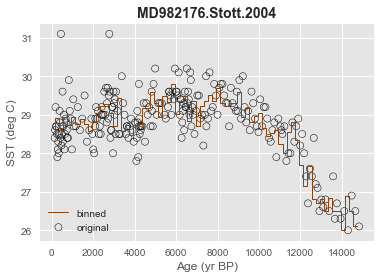

In [10]:
"""
Note the following provides an example on how to use pyleoclim in conjunction with making your own plots.
This example is mean to work with the following timeseries: MD982176.Stott.2004 :  sst
"""

# get a new timeseries object
new_timeseries = pyleo.LipdUtils.getTs(pyleo.timeseries_list) 

# Bin the data
bin_size = 200
bins, binned_data, n, error  = pyleo.binTs(timeseries = new_timeseries, bin_size = bin_size)

# Get the archiveType
archiveType = pyleo.LipdUtils.LipdToOntology(new_timeseries["archiveType"])

# Make a figure of the binned vs original data 
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")
marker = [pyleo.plot_default[archiveType][0], pyleo.plot_default[archiveType][1]] #define color coding
markersize = 50 #define marker size
plt.scatter(new_timeseries["age"], new_timeseries["paleoData_values"],
           s = markersize,
           facecolor = 'none',
           edgecolor = 'k',
           marker = 'o',
           label = 'original')
plt.step(bins-bin_size/2,binned_data,
        where = 'pre',
        color = marker[0],
        linewidth = 1.0,
        label = 'binned')
plt.xlabel("Age (yr BP)")
plt.ylabel("SST (deg C)")
plt.legend(loc = 3, scatterpoints =1, fancybox = True, shadow = True, fontsize = 10)
plt.title(new_timeseries["dataSetName"], fontsize = 14, fontweight = "bold")

### interpTs()

Bins the values of the timeseries 

synthax: `interp_age, interp_values = pyleoclim.interpTs(timeseries="", x_axis = "", interp_step = "", start = "", end = "")`

Optional arguments:
* `Timeseries`. Default is blank, will prompt for it
* `x-axis`: the time or depth index to use for binning. Valid keys inlude: depth, age, and year. 
* `interp_step`: the step size. If not given, the function will prompt the user
* `start`: where the bins should start. Default is the minimum 
* `end`: where the bins should end. Default is the maximum

Returns:
* `interp_age`: the interpolated age according to the end/start and time step
* `interp_values`: the interpolated values

0 :  Africa-ColdAirCave.Sundqvist.2013 :  d18O
1 :  Africa-ColdAirCave.Sundqvist.2013 :  year
2 :  Africa-ColdAirCave.Sundqvist.2013 :  SE
3 :  MD982176.Stott.2004 :  d18ow-s
4 :  MD982176.Stott.2004 :  yrbp
5 :  MD982176.Stott.2004 :  depth
6 :  MD982176.Stott.2004 :  sst
7 :  MD982176.Stott.2004 :  d18og.rub
8 :  MD982176.Stott.2004 :  mg/ca-g.rub
9 :  Arc-ScreamingLynx.Clegg.2011 :  temperature
10 :  Arc-ScreamingLynx.Clegg.2011 :  year
11 :  MD98-2170.Stott.2004 :  depth
12 :  MD98-2170.Stott.2004 :  mg/ca
13 :  MD98-2170.Stott.2004 :  d180
14 :  MD98-2170.Stott.2004 :  sst
15 :  MD98-2170.Stott.2004 :  age
16 :  MD98-2170.Stott.2004 :  d180w
17 :  Africa-LakeTanganyi.Tierney.2010 :  temperature
18 :  Africa-LakeTanganyi.Tierney.2010 :  lower95
19 :  Africa-LakeTanganyi.Tierney.2010 :  upper95
20 :  Africa-LakeTanganyi.Tierney.2010 :  year
21 :  Africa-LakeTanganyi.Tierney.2010 :  TEX86
22 :  Ocean2kHR-AtlanticMontegoBayHaaseSchramm2003 :  d18O
23 :  Ocean2kHR-AtlanticMontegoBayHaa

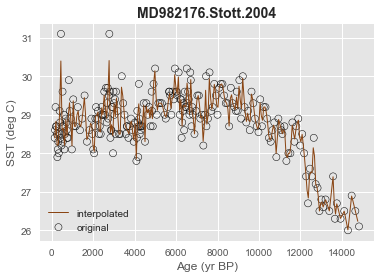

In [11]:
"""
Note the following provides an example on how to use pyleoclim in conjunction with making your own plots.
This example is mean to work with the following timeseries: MD982176.Stott.2004 :  sst
"""

# get a new timeseries object
new_timeseries = pyleo.LipdUtils.getTs(pyleo.timeseries_list) 

# interpolate the data
interp_age, interp_values = pyleo.interpTs(timeseries = new_timeseries)

# Get the archiveType
archiveType = pyleo.LipdUtils.LipdToOntology(new_timeseries["archiveType"])

# Make a figure of the binned vs original data 
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")
marker = [pyleo.plot_default[archiveType][0], pyleo.plot_default[archiveType][1]] #define color coding
markersize = 50 #define marker size
plt.scatter(new_timeseries["age"], new_timeseries["paleoData_values"],
           s = markersize,
           facecolor = 'none',
           edgecolor = 'k',
           marker = 'o',
           label = 'original')
plt.plot(interp_age,interp_values,
        color = marker[0],
        linewidth = 1.0,
        label = 'interpolated')
plt.xlabel("Age (yr BP)")
plt.ylabel("SST (deg C)")
plt.legend(loc = 3, scatterpoints =1, fancybox = True, shadow = True, fontsize = 10)
plt.title(new_timeseries["dataSetName"], fontsize = 14, fontweight = "bold")